In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [7]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [33]:
sample_submission = pd.read_csv('sample_submission_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')
training_data = pd.read_csv('train_dataset.csv')

In [34]:
training_data.head(2)

,headline,clickbait,ID
0,"Hussein enters ""not guilty"" plea at trial",0,84698cc7-8ae2-4ea3-a425-b7091561cee6
1,Iraq peace talks draw to a close in Finland,0,a4e35ca4-15fa-43e8-b68e-91457b23afee


In [35]:
test_data.shape

(15200, 2)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(training_data['headline'], training_data['clickbait'], random_state=0)

In [37]:
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2))
tfidf_text_train = tfidf.fit_transform(X_train)
tfidf_text_test = tfidf.transform(X_test)

In [38]:
#creating a function to call after each model iteration to print accuracy and recall scores for test and train
def train_results(preds):
    return "Training Accuracy:", accuracy_score(y_train,preds)," Training Recall:", recall_score(y_train,preds), "F1-score:", f1_score(y_train, preds)

def test_results(preds):
    return "Testing Accuracy:", accuracy_score(y_test,preds)," Testing Recall:", recall_score(y_test,preds),"F1-score:", f1_score(y_test, preds)

('Training Accuracy:', 1.0, ' Training Recall:', 1.0, 'F1-score:', 1.0)
('Testing Accuracy:', 0.9751315789473685, ' Testing Recall:', 0.9778818631277648, 'F1-score:', 0.9754704737183647)


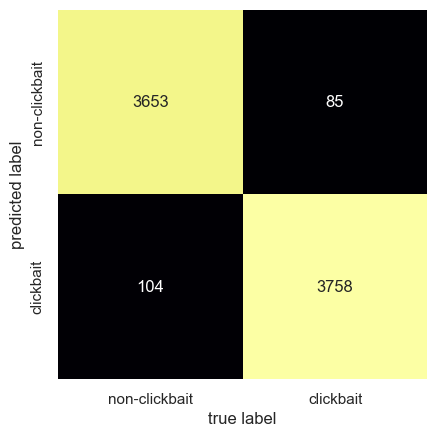

In [56]:
# lr = LogisticRegression(C=500, class_weight = 'balanced', solver = 'liblinear', tol=0.0001)
lr = LogisticRegression(C=1e5,class_weight = 'balanced',solver = 'liblinear', tol=0.0001)

lr.fit(tfidf_text_train, y_train)

lr_train_preds = lr.predict(tfidf_text_train)
lr_test_preds = lr.predict(tfidf_text_test)

print(train_results(lr_train_preds))
print(test_results(lr_test_preds))

#confusion matrix on test set lr Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, lr_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [58]:
final_x_test = test_data['headline']
tfidf_final_text_test = tfidf.transform(final_x_test )
nb_final_test_preds = lr.predict(tfidf_final_text_test)

In [59]:
pred_df = pd.DataFrame(nb_final_test_preds)
final_df = test_data.join(pred_df)
final_df_ = final_df[['ID', 0]]
final_df_  = final_df_.rename(columns={0: 'TARGET'})

In [62]:
final_df_

,ID,TARGET
0,5f99b099-c4db-4a02-9753-28c5e94a6b34,0
1,3c413552-32c0-4000-a745-b4217fe427ca,0
2,71060e3b-bab0-4218-b1ce-8284ae46f6c3,1
3,f0a03121-600f-4b69-b6db-989d0f3cf28a,1
4,456f7cfa-bdfe-45bd-9e88-7c4ae53eb4ba,0
...,...,...
15195,be658ab2-e073-4078-8d23-999bce6f0980,1
15196,3b876ee2-66c2-4743-8389-c93c2f598398,1
15197,f565e8b5-d6f0-4fb5-b1eb-3048d3e5d57a,0
15198,c0bc2203-cd7a-46c2-9e9b-5f41ea1bb346,1


In [64]:
final_df_.to_csv('submission_002.csv',index=None)